In [116]:
from sentinelsat import SentinelAPI
from datetime import date

In [117]:
api = SentinelAPI(None, None)

In [118]:
# footprint = geojson_to_wkt(read_geojson('malopolska.geojson'))

def getQuery(down_left, top_right, start_date, end_date):
    footprint = "POLYGON(("
    footprint += down_left[0] + " " + down_left[1] + ","
    footprint += down_left[0] + " " + top_right[1] + ","
    footprint += top_right[0] + " " + top_right[1] + ","
    footprint += top_right[0] + " " + down_left[1] + ","
    footprint += down_left[0] + " " + down_left[1]
    footprint += "))"

    return api.query(footprint,
                    date=(start_date, end_date),
                    platformname='Sentinel-2',
                    processinglevel='Level-2A',
                    cloudcoverpercentage=(0, 20))


In [119]:
products = getQuery(("19.792557", "50.004650"), ("20.102234", "50.107368"), date(2022, 1, 1), date(2022, 1, 31)) # Kraków from January

# examples:
# products = getQuery(("19.792557", "50.004650"), ("20.102234", "50.107368"), date(2020, 1, 1), date(2022, 1, 1))
# products = getQuery(("19.792557", "50.004650"), ("20.102234", "50.107368"), date(2000, 1, 1), "NOW")
# products = getQuery(("19.792557", "50.004650"), ("20.102234", "50.107368"), "NOW-5DAYS", "NOW")

In [120]:
products_df = api.to_dataframe(products)
products_df

,title,link,link_alternative,link_icon,summary,ondemand,generationdate,beginposition,endposition,ingestiondate,...,s2datatakeid,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,datastripidentifier,granuleidentifier,identifier,uuid
81b4de28-ebcf-4bdf-9a21-d19a901693e7,S2A_MSIL2A_20220129T094241_N0400_R036_T34UDA_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2022-01-29T09:42:41.024Z, Instrument: MS...",false,2022-01-29 13:13:46,2022-01-29 09:42:41.024,2022-01-29 09:42:41.024,2022-01-29 16:43:13.331,...,GS2A_20220129T094241_034496_N04.00,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_VGS2_20220129T131346_S2022...,S2A_OPER_MSI_L2A_TL_VGS2_20220129T131346_A0344...,S2A_MSIL2A_20220129T094241_N0400_R036_T34UDA_2...,81b4de28-ebcf-4bdf-9a21-d19a901693e7
3d54303b-cc4e-437a-9878-b2da193460a4,S2B_MSIL2A_20220124T094159_N0301_R036_T34UDA_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2022-01-24T09:41:59.024Z, Instrument: MS...",false,2022-01-24 11:17:02,2022-01-24 09:41:59.024,2022-01-24 09:41:59.024,2022-01-24 14:14:32.858,...,GS2B_20220124T094159_025516_N03.01,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_VGS4_20220124T111702_S2022...,S2B_OPER_MSI_L2A_TL_VGS4_20220124T111702_A0255...,S2B_MSIL2A_20220124T094159_N0301_R036_T34UDA_2...,3d54303b-cc4e-437a-9878-b2da193460a4
d876456b-5a8d-486e-a656-736beae4277a,S2A_MSIL2A_20220109T094401_N0301_R036_T34UDA_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2022-01-09T09:44:01.024Z, Instrument: MS...",false,2022-01-09 12:12:35,2022-01-09 09:44:01.024,2022-01-09 09:44:01.024,2022-01-09 14:40:49.921,...,GS2A_20220109T094401_034210_N03.01,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_VGS4_20220109T121235_S2022...,S2A_OPER_MSI_L2A_TL_VGS4_20220109T121235_A0342...,S2A_MSIL2A_20220109T094401_N0301_R036_T34UDA_2...,d876456b-5a8d-486e-a656-736beae4277a
5adace80-1c19-426e-81e5-96fb122a6f29,S2B_MSIL2A_20220107T095309_N0301_R079_T34UDA_2...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,https://apihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2022-01-07T09:53:09.024Z, Instrument: MS...",false,2022-01-07 12:08:20,2022-01-07 09:53:09.024,2022-01-07 09:53:09.024,2022-01-07 16:49:41.644,...,GS2B_20220107T095309_025273_N03.01,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_VGS4_20220107T120820_S2022...,S2B_OPER_MSI_L2A_TL_VGS4_20220107T120820_A0252...,S2B_MSIL2A_20220107T095309_N0301_R079_T34UDA_2...,5adace80-1c19-426e-81e5-96fb122a6f29


In [121]:
# download all results from the search
api.download_all(products)

ResultTuple(downloaded={'5adace80-1c19-426e-81e5-96fb122a6f29': {'id': '5adace80-1c19-426e-81e5-96fb122a6f29', 'title': 'S2B_MSIL2A_20220107T095309_N0301_R079_T34UDA_20220107T120820', 'size': 1031983945, 'md5': '5d16728c698e03dfec8e5e65049f6ad1', 'date': datetime.datetime(2022, 1, 7, 9, 53, 9, 24000), 'footprint': 'POLYGON((21.034813752858067 50.55164735187636,20.984877122648832 50.451599217203565,20.9133583594036 50.30725690237934,20.842410469831087 50.162917181328574,20.81838408725719 50.11380239658567,20.77119166773613 50.017640862798,20.725579749204684 49.92383636117939,20.701433514363263 49.87434329753848,20.631636605082143 49.729985767877935,20.56235276999032 49.5855852494964,20.550670413524266 49.561524875009304,19.616762732856103 49.55648784343155,19.588086136628576 50.54373233188457,21.034813752858067 50.55164735187636))', 'url': "https://apihub.copernicus.eu/apihub/odata/v1/Products('5adace80-1c19-426e-81e5-96fb122a6f29')/$value", 'Online': True, 'Creation Date': datetime.dat

In [122]:
import rasterio

In [123]:
dataset = rasterio.open('S2A_MSIL2A_20220109T094401_N0301_R036_T34UDA_20220109T121235.SAFE/GRANULE/L2A_T34UDA_A034210_20220109T094357/IMG_DATA/R10m/T34UDA_20220109T094401_B03_10m.jp2')
dataset2 = rasterio.open('S2A_MSIL2A_20220109T094401_N0301_R036_T34UDA_20220109T121235.SAFE/GRANULE/L2A_T34UDA_A034210_20220109T094357/IMG_DATA/R10m/T34UDA_20220109T094401_B08_10m.jp2')

array([[ 839, 1574, 1180, ...,  739,  788,  908],
       [ 890, 1168,  992, ...,  962,  745,  995],
       [1078,  902,  722, ..., 1400, 1116, 1356],
       ...,
       [ 742,  965,  601, ...,  805,  781,  918],
       [ 545,  766,  540, ...,  791,  858,  960],
       [ 513,  545,  406, ...,  876,  938,  956]], dtype=uint16)

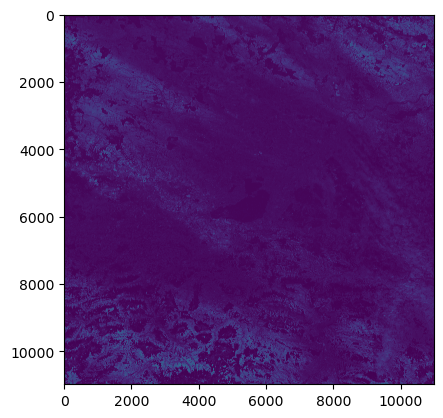

In [124]:
import matplotlib.pyplot as plt

image_band_1 = dataset.read(1)
plt.imshow(image_band_1)
image_band_1

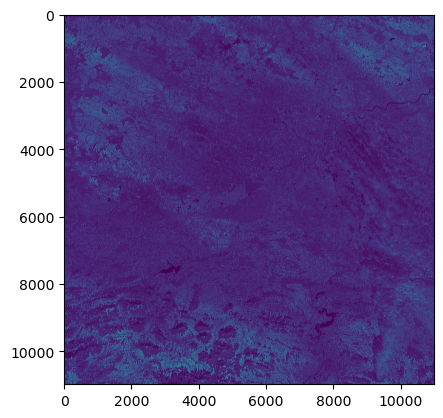

In [125]:
image_band_2 = dataset2.read(1)
plt.imshow(image_band_2)

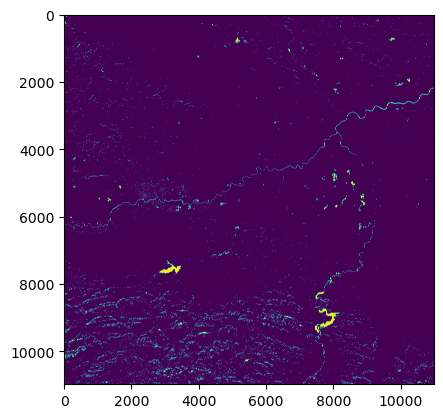

In [126]:
import numpy as np

# map 0 - ~16000 to 0.0 - 1.0
image_band_1_norm = image_band_1 / np.max(np.abs(image_band_1))
image_band_2_norm = image_band_2 / np.max(np.abs(image_band_2))

# 1 or 0 (water or not)
image_ndwi = (image_band_1_norm - image_band_2_norm) // (image_band_1_norm + image_band_2_norm + np.ones((image_band_1_norm.shape[0], image_band_1_norm.shape[1]))) + np.ones((image_band_1_norm.shape[0], image_band_1_norm.shape[1]))

# water mask true or false
water_mask = image_ndwi > 0.0

# show
plt.imshow(image_ndwi.astype('uint16'))


Opening file S2A_MSIL2A_20220109T094401_N0301_R036_T34UDA_20220109T121235.SAFE/GRANULE/L2A_T34UDA_A034210_20220109T094357/IMG_DATA/R10m/T34UDA_20220109T094401_B02_10m.jp2
Opening file S2A_MSIL2A_20220109T094401_N0301_R036_T34UDA_20220109T121235.SAFE/GRANULE/L2A_T34UDA_A034210_20220109T094357/IMG_DATA/R10m/T34UDA_20220109T094401_B03_10m.jp2
Opening file S2A_MSIL2A_20220109T094401_N0301_R036_T34UDA_20220109T121235.SAFE/GRANULE/L2A_T34UDA_A034210_20220109T094357/IMG_DATA/R10m/T34UDA_20220109T094401_B04_10m.jp2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


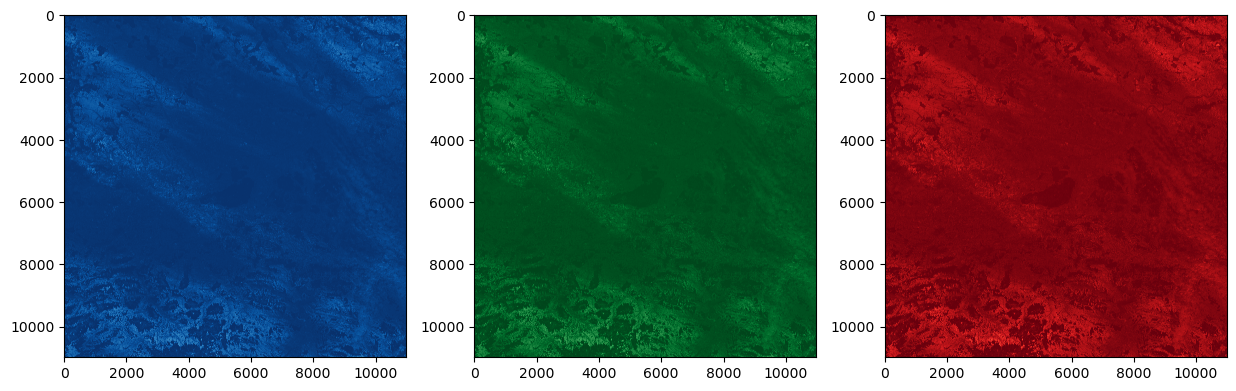

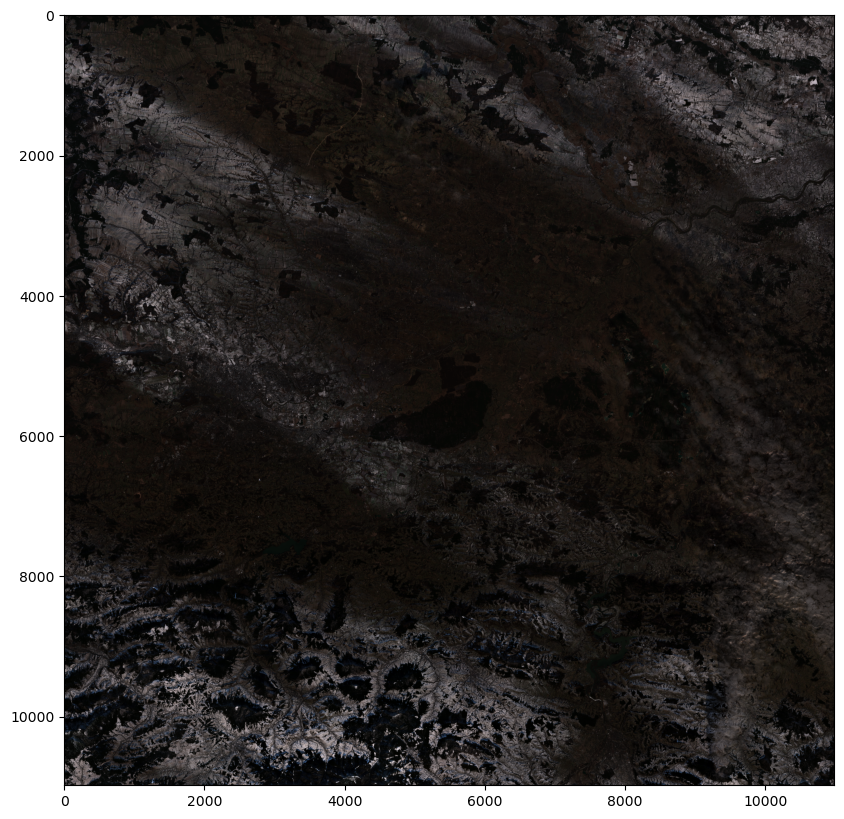

In [127]:
def load_landsat_image(img_folder, bands):
    image = {}
    for band in bands:
        file = img_folder + 'T34UDA_20220109T094401_' + band + '_10m.jp2'
        print(f'Opening file {file}')
        ds = rasterio.open(file)
        image.update({band: ds.read(1)})

    return image


def display_rgb(img, b_r, b_g, b_b, alpha=1., figsize=(10, 10)):
    rgb = np.stack([img[b_r], img[b_g], img[b_b]], axis=-1)
    rgb = rgb/rgb.max() * alpha
    plt.figure(figsize=figsize)
    plt.imshow(rgb)


img = load_landsat_image('S2A_MSIL2A_20220109T094401_N0301_R036_T34UDA_20220109T121235.SAFE/GRANULE/L2A_T34UDA_A034210_20220109T094357/IMG_DATA/R10m/', ['B02', 'B03', 'B04'])

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img['B02'], cmap='Blues_r')
ax[1].imshow(img['B03'], cmap='Greens_r')
ax[2].imshow(img['B04'], cmap='Reds_r')

display_rgb(img, 'B04', 'B03', 'B02', alpha=2.)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


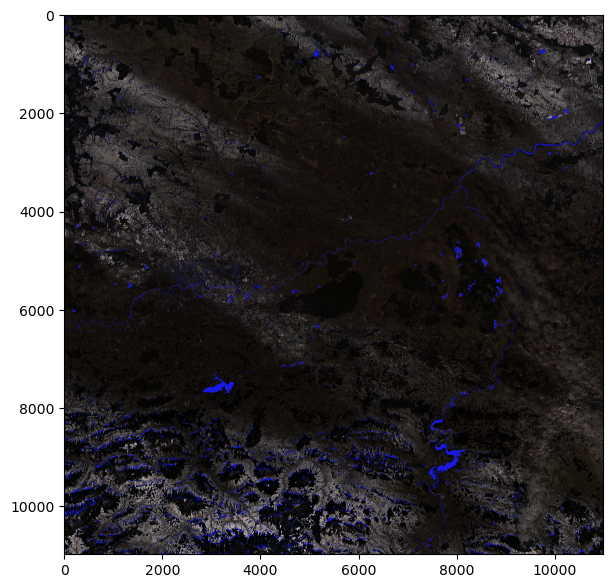

In [128]:
rgb = np.stack([img['B04'], img['B03'], img['B02']], axis=-1)
rgb = rgb/rgb.max() * 2

rgb[water_mask] = [0.1, 0.1, 0.9]

plt.figure(figsize=(7,7))
plt.imshow(rgb)